Logistic regression is a statistical machine learning algorithm that classifies the data by considering outcome variables on extreme ends and tries makes a logarithmic line that distinguishes between them.

In [0]:
from sklearn import datasets
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report ,plot_confusion_matrix
import numpy as np
import math
import matplotlib.pyplot as plt

In [0]:
X,y=datasets.make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5, n_classes=2,weights=[0.7], class_sep=0.7,  random_state=15)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [0]:
def plot_confusion_matrix(cm, title='CONFUSION MATRIX', cmap=plt.cm.Reds):
    target_names=['1','0']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
def initialize_weights(shape):
  """
  This function initializes the weights and bias of a model with a given shape. 
  The shape is specified as a tuple of integers, which represents the size of the weight matrix.
  The function creates a weight matrix w with the same shape as the input data and fills it with zeros.
  It also creates a bias term b and initializes it to 0. The weight matrix and bias are returned as a tuple.
  
  Here is a breakdown of each part of the function:
  shape: This is a tuple of integers that specifies the size of the weight matrix.
  b: This is the bias term, which is initialized to 0.
  w: This is the weight matrix, which is initialized with the same shape as the input data and filled with zeros.
  np.zeros_like(X_train[0]): This creates a weight matrix with the same shape as the first sample in the input data X_train.
  The matrix is filled with zeros.
  return w,b: This returns the weight matrix and bias as a tuple.
  """
  
  b = 0
  w = np.zeros_like(X_train[0])
  return w,b

In [0]:
def sigmoid(z):
	"""
	This function calculates the sigmoid of a given input value z. The sigmoid function is defined as:
    sigmoid(z) = 1 / (1 + exp(-z))
    Where exp is the exponential function. The sigmoid function maps any input value to a value between 0 and 1. 
    It is often used as the activation function in neural networks and logistic regression models.

    Here is a breakdown of each part of the function:
    z: This is the input value for which the sigmoid function is being calculated.
    sigmoid_: This is the output of the sigmoid function, which is calculated as 1/(1 + exp(-z)).
    return sigmoid_: This returns the output of the sigmoid function.
	"""
	sigmoid_ = 1/(1+math.exp(-z)) # Your code goes here
	return sigmoid_

In [0]:
def logloss(y_actual,y_pred):
  """
  this function calculates the log loss of a set of predicted values y_pred given the actual values y_actual.
  The log loss is a measure of the performance of a classification model, 
  where the prediction outcome is a probability between 0 and 1. It is defined as:

  log loss = -(1/N) * ∑(y_actual * log(y_pred) + (1 - y_actual) * log(1 - y_pred))
  
  y_actual: This is a list or array of actual target values.

  y_pred: This is a list or array of predicted target values, where each value is a probability between 0 and 1.

  N: This is the length of the y_actual list. It represents the number of samples in the data set.

  sum1: This variable is used to store the sum of the log loss for each sample in the data set. It is initialized to 0.

   The for loop iterates over each sample in the data set. For each sample, the log loss is calculated as:
   log loss = y_actual * log(y_pred) + (1 - y_actual) * log(1 - y_pred)
   This value is then added to the sum1 variable.
   Finally, the average log loss is calculated by dividing sum1 by N and multiplying the result by -1. 
   This final value is returned   as the output of the function.
  """
  N=len(y_actual)
  sum1=0
  for i in range(N):
    diff=1-y_pred[i]
    s=(y_actual[i]*np.log10(y_pred[i])) + ((1-y_actual[i])*np.log10(diff))
    sum1+=s
  loss = -1 * 1/N *sum1 
  return loss

In [0]:
def gradient_wrtb(X,y,w,b):
  """
  This function calculates the gradient of the log loss function with respect to the bias term b.
  The log loss function is a measure of the performance of a classification model, 
  where the prediction outcome is a probability between 0 and 1.
  The gradient of the log loss with respect to the bias is given by:
  gradient(b) = sigmoid(w^T * X + b) - y
  Where sigmoid is the sigmoid function, w is the weight matrix, X is the input data, 
  b is the bias term, and y is the actual target value.

 The function takes in the input data X, the actual target values y, the weight matrix w, and the bias term b as arguments.
 It calculates the gradient of the log loss with respect to the bias and returns the result.

 Here is a breakdown of each part of the function:
 X: This is the input data, which is an array of independent variables.
 y: This is the actual target values, which is an array of the same size as X.
 w: This is the weight matrix, which is an array of the same size as X.
 b: This is the bias term, which is a scalar value.
 gradient_db: This is the gradient of the log loss with respect to the bias term. It is calculated as sigmoid(np.dot(w.T, X )+ b)-y.
 return gradient_db: This returns the gradient of the log loss with respect to the bias term.
 """
  gradient_db = sigmoid(np.dot(w.T, X )+ b)-y
  return gradient_db

In [0]:
def gradient_wrtw(X,y,w,b):
  """This function calculates the gradient of the log loss function with respect to the weight matrix w.
  The log loss function is a measure of the performance of a classification model, 
  where the prediction outcome is a probability between 0 and 1.
  The gradient of the log loss with respect to the weight matrix is given by:
  gradient(w) = X^T * (sigmoid(w^T * X + b) - y)
  Where sigmoid is the sigmoid function, X is the input data, w is the weight matrix, b is the bias term, 
  and y is the actual target value.
  The function takes in the input data X, the actual target values y, the weight matrix w, and the bias term b as arguments. 
  It calculates the gradient of the log loss with respect to the weight matrix and returns the result.

  Here is a breakdown of each part of the function:
  X: This is the input data, which is an array of independent variables.
  y: This is the actual target values, which is an array of the same size as X.
  w: This is the weight matrix, which is an array of the same size as X.
  b: This is the bias term, which is a scalar value.
  gradient_dw: This is the gradient of the log loss with respect to the weight matrix. 
  It is calculated as  np.dot(X.T,sigmoid(np.dot(w.T, X )+ b)-y).
  return gradient_dw: This returns the gradient of the log loss with respect to the weight matrix.
"""
  gradient_dw = np.dot(X.T,sigmoid(np.dot(w.T, X )+ b)-y)
  return gradient_dw

In [0]:
def prediction(X,w,b):
  """
  This function takes in three arguments:
  X, which is a list of values of the independent variables
  w, which is the weight of the model
  b, which is the bias of the model
  It then iterates through each value in X, calculates the dot product of w and the current value of X, adds b, 
  and passes the result through the sigmoid function.
 If the output of the sigmoid function is greater than or equal to 0.5, the function appends 1 to the list predictions. 
 Otherwise, it appends 0.

 Finally, the function returns the list predictions, which contains the predicted values of the dependent variable y.
 """
  predictions = []
  for i in range(len(X)):
    z = np.dot(w, X[i]) + b
    y_pred = sigmoid(z)
    if y_pred >= 0.5:
      predictions.append(1)
    else:
      predictions.append(0)
  return predictions   

In [0]:
def logistic_regression(X_train,y_train,X_test,y_test,epochs,LR,L1,L2, batch_size = 1):
    
    ''' In this function, we will implement logistic regression with L1 and L2 regularization
    X_train:Training Input Dataset
    y_train:Training Output Dataset
    X_test:Testing Input Dataset
    y_test:Testing Output Dataset
    epochs:No of epochs or iterations to fit the best weights
    LR:Learning Rate for Gradient Descent
    L1:L1 regularization hyperparameter
    L2:L2 regularization hyperparameter
    batch_size:Batch Size to implement SGD 
    '''
    N = len(X_train)
    train_loss = []
    test_loss = []
    w, b = initialize_weights(X_train[0])
    for i in range(epochs):
      
      for i in range(0,N,batch_size):
          dw = gradient_wrtw(X_train[i],y_train[i],w,b) + L1 * np.sign(w) + L2 * w  # add L1 and L2 regularization terms to gradient update for weights
          db = gradient_wrtb(X_train[i],y_train[i],w,b)
          w = w - (LR * dw)
          b = b - (LR * db)
      y_pred_train=prediction(X_train,w,b)
      train_loss.append(logloss(y_test,y_pred_train))
      y_pred_test=prediction(X_test,w,b)
      test_loss.append(logloss(y_test,y_pred_test))
    return w,b,train_loss,test_loss






In [0]:
epochs = 100
LR = 0.001
L1 = 0.01
L2 = 0.01

# Call the function
w,b,train_loss,test_loss = logistic_regression(X_train,y_train,X_test,y_test,epochs,LR,L1,L2)

/local_disk0/tmp/1673174063994-0/PythonShell.py:27: RuntimeWarning: divide by zero encountered in log10
 
/local_disk0/tmp/1673174063994-0/PythonShell.py:27: RuntimeWarning: invalid value encountered in multiply

In [0]:
w

Out[59]: array([-0.38480577, 0.20085543, -0.01393337, 0.34277832, -0.17012719,
 0.47125717, -0.35970298, -0.00918947, 0.10698503, 0.10306338,
 0.09112999, -0.00086807, -0.00720535, 0.28264151, -0.03041991])

In [0]:
b

Out[60]: -0.8424623769760174

In [0]:
y_pred_train = prediction(X_train,w,b)
y_pred_test = prediction(X_test,w,b)

In [0]:
cm_tr = confusion_matrix(y,y_pred)
cm_tr

Out[69]: array([[32279, 2625],
 [ 5936, 9160]])

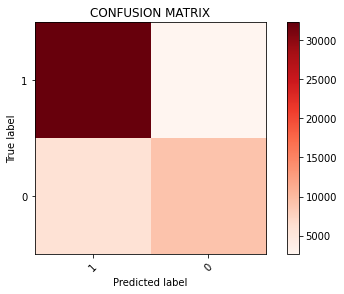

In [0]:
plot_confusion_matrix(cm_tr)

In [0]:
cm_te = confusion_matrix(y_test,y_pred_test)
cm_te


Out[71]: array([[8082, 651],
 [1475, 2292]])

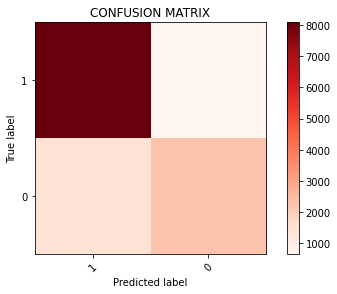

In [0]:
plot_confusion_matrix(cm_te)

In [0]:
cr_tr = classification_report(y_train,y_pred_train)
print(cr_tr)

precision recall f1-score support

 0 0.84 0.92 0.88 26171
 1 0.78 0.61 0.68 11329

 accuracy 0.83 37500
 macro avg 0.81 0.77 0.78 37500
weighted avg 0.82 0.83 0.82 37500

In [0]:
cr_te = classification_report(y_test,y_pred_test)
print(cr_te)

precision recall f1-score support

 0 0.85 0.93 0.88 8733
 1 0.78 0.61 0.68 3767

 accuracy 0.83 12500
 macro avg 0.81 0.77 0.78 12500
weighted avg 0.83 0.83 0.82 12500

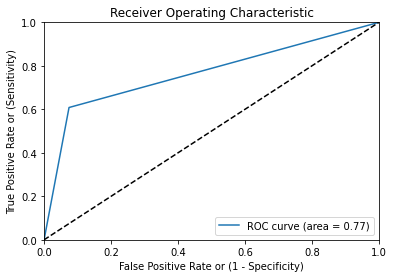

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_test)

# Compute false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specificity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [0]:
#end of notebook